## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [24]:
# Combine the data into a single dataset
mouse_data_df=pd.merge(mouse_metadata,study_results,how = 'inner',on='Mouse ID')
# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# mouse_data_df.dtypes

In [26]:
# Checking the number of mice.
mouse_data_df['Mouse ID'].nunique()

249

In [27]:
# Sort the Data by Mouse ID
mouse_data_df.sort_values("Mouse ID", inplace = True)

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
grouped_mice_data = mouse_data_df.groupby(['Mouse ID','Timepoint'])
mice_count = grouped_mice_data.count()
dupe_mice = mice_count.loc[mice_count["Drug Regimen"]>1,:]
dupe_mice

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = mouse_data_df.loc[mouse_data_df['Mouse ID']!= 'g989']
clean_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data['Mouse ID'].nunique()

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen

summary_data = clean_mice_data[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_summary_data = summary_data.groupby(["Drug Regimen"])

mean = summary_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean').map('{:.2f}'.format)
median = summary_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median').map('{:.2f}'.format)
variance = summary_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].rename('Variance').map('{:.2f}'.format)
standard_variance = summary_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].rename('Standard Variance').map('{:.2f}'.format)
sem = summary_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].rename('SEM').map('{:.2f}'.format)

summary_df = pd.DataFrame({'Mean': mean,
                          'Median': median,
                          'Variance': variance,
                          'Standard Variance':standard_variance,
                          'SEM': sem})
summary_df

,Mean,Median,Variance,Standard Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [32]:
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


## Bar and Pie Charts

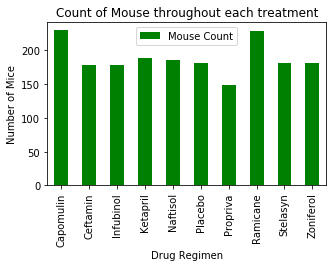

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = clean_mice_data.groupby(['Drug Regimen']).count()['Mouse ID'].rename('Mouse Count')
mouse_count.head()
mouse_count_df = pd.DataFrame({'Mouse Count': mouse_count})
# mouse_count_df

mouse_count_df.plot(kind="bar",color = 'green', figsize=(5,3))
plt.title("Count of Mouse throughout each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

In [42]:
# drugs = ['Capomulin','Ceftamin','Infubinol''Ketapril','Naftisol','Propriva','Placebo','Ramicane''Stelasyn','Zoniferol']

# x_axis = np.arange(0,len('Mouse ID'))
# tick_locations = []
# for x in x_axis:
#     tick_locations.append(x)
# # tick_locations

# plt.figure(figsize = (6,4))
# plt.bar(x_axis,mouse_count, facecolor="green", alpha=1, align="center")
# plt.xticks(tick_locations, drugs,rotation = 'verticle')


# plt.xlim(-.50, len(drugs)-.50)
# plt.ylim(0, 211)

# plt.title("Count of Mouse throughout each treatment")
# plt.xlabel("Drug Regimen")



# plt.show()
# plt.tight_layout()

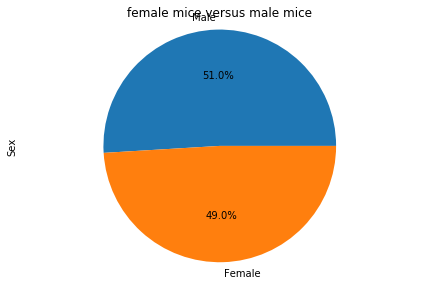

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count = clean_mice_data["Sex"].value_counts()
plt.figure()
mouse_count.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("female mice versus male mice")
plt.tight_layout()
plt.show()


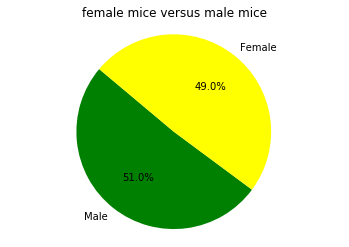

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["green","yellow"]

plt.figure()
plt.pie(mouse_count.values, labels=mouse_count.index.values, colors=colors,
        autopct="%1.1f%%", startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("female mice versus male mice")
plt.show()


In [37]:
# clean_mice_data.head(30)

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_time_point = clean_mice_data [['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

last_time_point = last_time_point.loc[(last_time_point['Drug Regimen']=="Capomulin")| \
                                      (last_time_point['Drug Regimen']== 'Ramicane')|\
                                       (last_time_point['Drug Regimen']=='Infubinol')|\
                                        (last_time_point['Drug Regimen']=='Ceftamin'),:]

last_time_point = last_time_point.sort_values('Timepoint',ascending = False).drop_duplicates(subset = 'Mouse ID',keep='first')

last_time_point = last_time_point.loc[last_time_point['Timepoint']!= 0,:]

# last_time_point_df = last_time_point.rename(columns={'Tumor Volume (mm3)':'Max Tumor Size'}) 
last_time_point

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine quartiles
quartiles = last_time_point['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = last_time_point.loc[(last_time_point['Tumor Volume (mm3)'] > upper_bound) | (last_time_point['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

# If I have done this correctly, it does not appear there are outliers.

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)


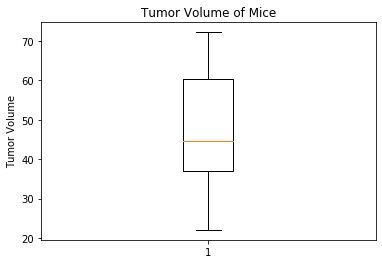

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume = last_time_point['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)
plt.show()
plt.tight_layout()



## Line and Scatter Plots

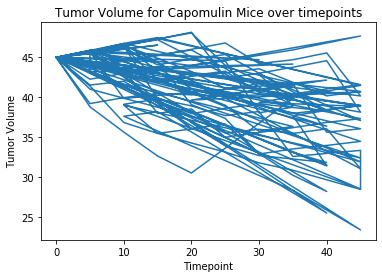

<Figure size 432x288 with 0 Axes>

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Filter original data for Capomulin only
capomulin_only_df = mouse_data_df.loc[(mouse_data_df["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = capomulin_only_df["Timepoint"]
tumor_volume = capomulin_only_df["Tumor Volume (mm3)"]
# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)
# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume for Capomulin Mice over timepoints')
plt.show()
plt.tight_layout()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
